# ** 2. Differentiation**

Calculating an analytical solution to a derivative is not always feasible or possible. In such a situation, we turn to numerical differentiation. In the following notebook, we will be discussing two numerical differentiation methods, the forward difference and central difference. 

In order to derive the forward and central difference formulas, we begin with a Taylor series:

$$ f(x)\ =\ f(a)\ +\ \frac{f'(a)}{1!}(x-a)\ +\ \frac{f''(a)}{2!}(x-a)^2\ +\ \frac{f'''(a)}{3!}(x-a)^3\ +\ \dots\ +\ \frac{f^{(n)}(a)}{n!}(x-a)^n\ + \dots$$

where $a$ is the point about which the series is expanded. Performing a substitution using $(x\ -\ a) = h$:

$$ f(x)\ =\ f(a)\ +\ \frac{f'(a)}{1!}h\ +\ \frac{f''(a)}{2!}h^2\ +\ \frac{f'''(a)}{3!}h^3\ +\ \dots\ +\ \frac{f^{(n)}(a)}{n!}h^n\ + \dots$$

Here, $h$ is the step size for the differentiation. The choice of $h$ must be taken with great care as it has the potential of introducing error and rendering the solution incorrect and meaningless. The effects of this can be seen by considering the simple form of a derivative:

 $$f'(x)\ =\ \frac{f(x+h)-f(x)}{h}$$
 
A large value of $h$ will cause unrealistic results or a divergence as this neglects to capture the behavior of the functions derivative. On the other hand, a small value of $h$ introduces round-off errors, as a computer can only store numbers to a certain precision (often ~ $10^{-15}$ for personal computers) and any a step size smaller than this precision will return incorrect results. Round-off error can be introduced into numerical methods calculations in many ways:

1. Addition of nearly equal numbers
2. Subtracting a small from a large number
3. Division of by a small number
3. User input error (pi = 3.1415)
4. Data type coding error (double/float can result a loss of accuracy)

In differentiation, round-off errors results from the addition of nearly equal number. Thus an optimal value of $h$ exists which offers a trade off between the two forms of error.

The code block below imports the necessary modules, defines the function we will evaluate, the corresponding analytical derivative, and the initial variables.


**An important note for this notebooks:** when defining functions, you may want to explore functions not included in Python by default, such as sine, cosine, e, etc. We typically incorporate these functions through the Numpy module by first importing Numpy as np in the beginning of our code and then defining these functions as np.sin(), np.cos(), and np.exp(). However, for this notebook, we will use a slightly different module named Sympy to define these functions. As you can see. we have imported Sympy as syp. This means when you want to call to a function from the Sympy library, import them as syp.sin(), syp.cos(), syp.exp(). The Sympy package will help us calculate the analytical gradients using Python, enabling you to check errors of differentiation from the true result, but saving you the trouble from calculating them by hand.  

In [1]:
###########
# IMPORTS #
###########
# These are packages needed to perform the math and visualization
import numpy as np
import IPython
from IPython.display import Math
import matplotlib.pyplot as plt
import plotting_functions as pf
import sympy as syp
syp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
%matplotlib notebook

#############
# FUNCTIONS #
#############


def f(x):
    """
    Defining the function to be evaluated
    INPUT
        float x
    OUTPUT
        float 
    """
    return x**2


###############
# GLOBAL VARS #
###############
# point at which we would like to evaluate the derivative
x = 1.0
# step size: distance between x and a, dx
h = 1.0e-1
# the range of x values we would like to plot between:
x_minimum = -1.5
x_maximum = 2
#exact derivative to compare our approximation to.
exact_first_derivative = pf.analytical_first_derivative(f,x)
exact_second_derivative = pf.analytical_second_derivative(f,x)
# dictionaries to hold error of each method
error_1 = dict()
error_2 = dict()


## ** 2.1  Forward Difference Formula for First Derivatives **

In order to obtain the forward difference formula, we truncate the Taylor series after the first derivative term. 

This gives the following

$$ f(x)\ \sim\ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \mathcal{O}(h^2)$$

The $O(h^2)$ term might be new to some of you. This notation indicates the magnitude of the error introduced by truncating the Taylor series, for this reason it is referred to as the truncation error. Rearranging the above expression to isolate $f'(a)$,

$$ f'(a)\ =\ \frac{f(a+h)\ -\ f(a)}{h} + \mathcal{O}(h^2)$$

This formula represents the forward difference approximation. In the plot below, a geometric interpretation of the forward difference approximation is given to the function you defined above.  Here, the tangent line through $f(a)$ is shown in red. The approximation is shown between the $f(a)$ (red point) and $f(a+h)$ (blue point). The approximation to the first derivative is taken as the secant line between the two points, shown in green. A graphical representation of the forward difference approximation (in red) implemented on $f(x)$ (in black) is shown below. What you should notice is that the approximation, is not quite overlaid with the actual tangent line. 

## Your Task!
1. Answer the following multiple choice question. To answer place the number of the correct choice in the Python function below.

### Question 1
This type of error will dominate when the step size is small:
      1. discretization error
      2. truncation error
      3. round-off error
      4. speculation error
      5. none of the above

In [2]:
pf.question_one_check()

Please input a valid response



                          The step size is too large
                       The answer below is not reliable
                        Truncation error will dominate
                         Please input a smaller value
            


<IPython.core.display.Javascript object>


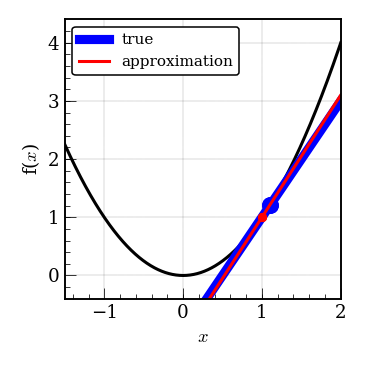

In [3]:
#input variables are:
#(x minimum, x maximum, function, derivative of f, x, step size)
pf.plot_fdiff_func(x_minimum, x_maximum, f, pf.analytical_first_derivative, x, h)

Applying this method to a real problem, the following Python code approximates the derivative of the function defined in the first code block of the notebook. By default the function is $f(x)\ =\ e^{x^2}$ at the point $x\ =\ 1$. 

The code implementing the forward difference approximation of $f(x)$ is shown below.  The Python code considers the value approximated with the Forward Difference method and calculates the error when compared to the analytical first derivative.

In [ ]:
#############
# FUNCTIONS #
#############

def Forward_Diff(f, a, h):
    """
    Calculates the first derivative based on the Forward Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: first derivative evaluated at a
    """
    fd_step_size_result = pf.fd_step_size_check(h)
    print(fd_step_size_result['message'])
    return (f(a + h) - f(a)) / h


#############
# MAIN CODE #
#############
approximation = Forward_Diff(f, x, h)
method = "Forward Difference"
error_1[method] = approximation - exact_first_derivative
print("Method: {}".format(method))
print("Approximation of f'({}) = {}".format(x, approximation))
print("Exact Evaluation of f'({}) = {}".format(x,exact_first_derivative))
print("Error = {}".format(error_1["Forward Difference"]))

## ** 2.2 Forward Difference Determination of Second Derivatives **

The forward difference method can be extended to second derivatives. This requires two points that are spaced by an interval of $h$, $x = a+h$ and $x= a+2h$.
Each of these terms are expanded into their respective Taylor series:

$x=a+h$
$$f(x)= f(a+h) = f(a)+ f'(a)(h) + \frac{f''(a)(h)^2}{2} + \mathcal{O}(h^3)$$

$$f'(a)= \frac{f(a+h) - f(a) - \frac{f''(a)(h)^2}{2}}{h} + \mathcal{O}(h^3)$$

$x=a+2h$
$$ f(x)= f(a+2h) = f(a)+ f'(a)(2h) + \frac{f''(a)(2h)^2}{2} + \mathcal{O}(h^3)$$
$$ f'(a)= \frac{f(a+2h)- f(a) -f''(a)(2h^2)}{2h} + \mathcal{O}(h^3)$$

We can set these two terms equal to each other:

$$\frac{f(a+h) - f(a) - \frac{f''(a)(h)^2}{2}}{h} + \mathcal{O}(h^3)=\frac{f(a+2h)- f(a) -f''(a)(2h^2)}{2h} + \mathcal{O}(h^3)$$
multiply by $2h$ on both sides,

$$2f(a+h) - 2f(a) - f''(a)(h)^2=f(a+2h)- f(a) -f''(a)(2h^2) + \mathcal{O}(h^3)$$

collect the like terms, isolating $f''(a)$

$$f''(a)(2h^2) - f''(a)(h)^2= f(a+2h) -2f(a+h)+ 2f(a) -f(a)  + \mathcal{O}(h^3)$$

Simplifying this expression results in:
$$ f''(a)\ =\ \frac{f(a+2h)-2f(a+h)+f(a)}{h^2} + \mathcal{O}(h^3)$$

## Your Task 
1. Answer the following multiple choice question. To answer place the number of the correct choice in the Python function below.

### Question 2
The $\mathcal{O}(h^3)$ term at the end of the forward difference approximation
      1. Represents that this approximation takes into three points, one in the center and one to each side
      2. Represents the round-off error introduced.
      3. Represents exactly the error of all remaining terms in the infinite Taylor series
      4. Approximately represents the discretization error introduced by tuncating the Taylor series
      5. none of the above

In [ ]:
pf.question_two_check()

In [ ]:
###########
# IMPORTS #
###########
import numpy as np
#############
# FUNCTIONS #
#############


def Forward_Diff_2nd(f, a, h):
    """
    Calculates the second derivative based on the Forward Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: second derivative evaluated at a
    """
    return (f(a + 2 * h) - 2 * f(a + h) + f(a)) / (h**2)
#############
# MAIN CODE #
#############
approximate = Forward_Diff_2nd(f, x, h)
method = "Forward Difference"
error_2[method] = approximate - exact_second_derivative
print("Method: {}".format(method))
print("Approximation of f''({}) = {}".format(x, approximate))
print("Exact Evaluation of f''({}) = {}".format(x, exact_second_derivative))
print("Error = {}".format(error_2["Forward Difference"]))

## ** 2.3  Central Difference Formula for First Derivatives**

The forward difference formula is one estimation of the derivative, but introduces large truncation error and thus we want to consider more accurate methods. The central difference formula can also provide useful approximation for first derivatives with a reduction of truncation error.  In order to obtain this relationship, one takes two similar Taylor expressions as shown above for the Forward difference formula, but here we don't just look at a point in the positive direction of a, but also in the negative direction of a. This will capture behavior of the curve surrounding the expansion point. 

$$ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ \ \mathcal{O}(h^3) $$

$$ f(a-h)\ =\ f(a)\ -\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ \ \mathcal{O}(h^3) $$

Subtracting the second Taylor series expression from the first gives:

$$ f(a+h)\ -\ f(a-h)\ =\ 2hf'(a)  + \mathcal{O}(h^3)$$

We rearrange and isolate for $f'(a)$:

$$ f'(a)\ =\ \frac{f(a+h)\ -\ f(a-h)}{2h} +\mathcal{O}(h^3)$$
 

The code implementing the central difference approximation on $f(x)$ is shown below. The Python code considers this actual value and calculates the error associated with the central difference approximation. 

A graphical representation of the central difference approximation of the first dervative is given when the plotting command below is ran. Run the code now. Here, $a$ is the red point at $(a,f(a))$ with the tangent line, also shown in red, represents the analytical value at that point. The Central Difference approximation occurs at $f(a+h)$ and $f(a-h)$, the blue points. The blue line is the secant line between them. By comparison of the two methods, we see that the Central Differnce method gives a much better approximation of the first derivative as compared to the Forward Difference method.

In [ ]:
#input variables are:
#(x minimum, x maximum, function, derivative of f, x, step size)
pf.plot_cdiff_func(x_minimum, x_maximum, f, pf.analytical_first_derivative, x, h)

In [ ]:
#############
# FUNCTIONS #
#############


def Central_Diff(f, a, h):
    """
    Calculates the second derivative based on the Central Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: first derivative evaluated at a
    """
    cd_step_size_result = pf.cd_step_size_check(h)
    print(cd_step_size_result['message'])
    return (f(a + h) - f(a - h)) / (2 * h)

#############
# MAIN CODE #
#############
approximation = Central_Diff(f, x, h)
method = "Central Difference"
error_1[method] = approximation - exact_first_derivative
print("Method: {}".format(method))
print("Approximation of f'({}) = {}".format(x, approximation))
print("Exact Evaluation of f'({})  = {}".format(x,exact_first_derivative))
print("Error = {}".format(error_1["Central Difference"]))

## ** 2.4  Central Difference Formula for Second Derivatives **

The previously discussed central difference formula can also be utilized to approximate the second derivative of a function.  Taking our two Taylor series expressions from above:

$$ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ \frac{h^3}{6}f'''(a)\ +\ \mathcal{O}(h^4) $$

$$ f(a-h)\ =\ f(a)\ -\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ -\ \frac{h^3}{6}f'''(a)\ +\ \mathcal{O}(h^4) $$

we add these expressions in this case as opposed to the subtraction that was used to obtain the central difference formula for first derivatives.  Upon addition, we obtain:

$$ f(a+h)\ +\ f(a-h)\ =\ 2f(a)\ +\ h^2f''(a)\ +\ \mathcal{O}(h^4) $$

Rearrange and isolate for $f''(a)$, and obtain:

$$ f''(a)\ =\ \frac{f(a+h)\ -\ 2f(a)\ +\ f(a-h)}{h^2} + \mathcal{O}(h^4) $$

The following Python code illustrates the central difference formula in practice on the same example discussed previously. The Python code considers this actual value and calculates the error associated with the central difference approximation.

In [ ]:
#############
# FUNCTIONS #
#############


def Central_Diff_2nd(f, a, h):
    """
    Calculates the second derivative based on the Central Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: second derivative evaluated at a
    """
    return (f(a + h) - 2 * f(a) + f(a - h)) / (h**2)
#############
# MAIN CODE #
#############
approximation = Central_Diff_2nd(f, x, h)
method = "Central Difference"
error_2[method] = approximation - exact_second_derivative
print("Method: {}".format(method))
print("Approximation of f''({}) = {}".format(x, approximation))
print("Exact Evaluation of f''({}) = {}".format(x,exact_second_derivative))
print("Error = {}".format(error_2["Central Difference"]))

# 2.5 What method has lowest error

In [ ]:
print("{:-^39}".format(""))
print("{:^39}".format("FIRST DERIVATIVE"))
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Error"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(error_1, key=error_1.get, reverse=True):
    print( "{:>25} : {:>.5E}".format(i, error_1[i]))
print( "{:-^39}".format(""))

print("")
print("")

print("{:-^39}".format(""))
print("{:^39}".format("SECOND DERIVATIVE"))
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Error"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(error_2, key=error_2.get, reverse=True):
    print("{:>25} : {:>.5E}".format(i, error_2[i]))
print("{:-^39}".format(""))


One should observe the significant imporvement central difference provides over forward difference. This comes with a reduction of discretization error! Recall that the error is order $ \mathcal{O}(h^2) $ for forward difference, while the error is order $\mathcal{O}(h^3)$ for central difference. Thus for a given step size, central difference will reduce the error and general be a better choice for discretization. 

# 2.6 Black Body Radiation

Black body radiation is the electromagnetic radiation (light) given off by an opaque object that is in thermal equilibrium with its surroundings.
Describing black body radiation was a monumental problem at the turn of the 20th century.
Classical physics predicted that distribution of emitted light would approach infinity as wavelength decreased (see the dotted line in the first plot before).
This distribution is the Rayleigh-Jeans law:

$$ B(\lambda, T ) = \frac{2 c k_B T}{\lambda^4} $$

where $\lambda$ is the wavelength of the light, $c$ is the speed of light, $k_B$ is Boltzmann's constant, and $T$ is the temperature.

However, this behavior would contradict the principle of conservation of energy.
This is known as the ultraviolet catastrophe.
Quantum mechanics properly describes this behavior.

This radiation covers a range of the complete electromagnetic spectrum as demonstrated in the first plot below.
The distribution of spectral radiance is given by

$$B(\lambda, T ) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}}-1}$$

where $h$ is Planck's constant, $\lambda$ is the wavelength of the light, $c$ is the speed of light, $k_B$ is Boltzmann's constant, and $T$ is the temperature.


## Wien's Displacement Law
Wien found that the radiation curve is inversely proportional to temperature.
From this relationship, an expression for the maximum wavelength is given by:

 $$ \lambda_{max} = \frac{b}{T}$$

 where $b$ is the proportionality constant and $T$ is the absolute temperature.
 The proportionality constant must be determined numerically and is $b= 2.897729 \times 10^6$nm K.

# Exercise

To highlight the practicality of numerical differentiation, we will derive this relationship using ``numerical experimentation''.
We will use the distribution of the spectral radiance and find the derivative numerically using the central difference method.

- First, we will determine the $\lambda_{max}$ value by tuning the derivative of $\lambda_{max}$ to be zero using the slider.
- Repeat this process for several temperatures.
- Then we will determine the slope of the relationship between $\lambda_{max}$ and inverse $T$ to determine the proportionality constant.

## Your task
1. Run the code block below to produce and interactive plot that shows the derivative of a black body radiation curve approximated with the central difference formula. 
    **Note:** this code block will look intimidating, you do NOT need to change anything, only run and interact with the resulting plot.
2. Slide the temperature slide to a specific temperature and record in **`temperature_data`** structure in the last code block of the notebook.
3. Staying at this temperature, position the $\lambda$ slider at the top of the black body peak (blue line) where the derivative is as close to zero as possible. Place the value of $\lambda_max$ in the **`lambda_data`** structure in the last code block of the notebook.
4. repeat steps 2 & 3 at 8 different temperatures.

<IPython.core.display.Javascript object>


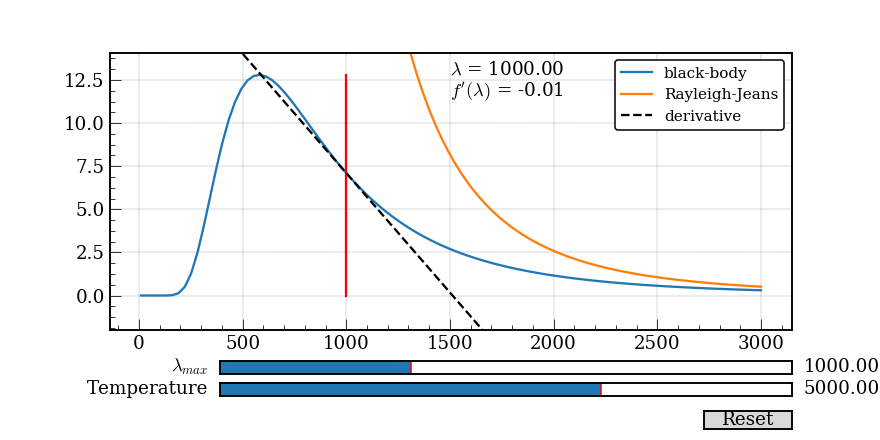

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import scipy.constants as sc

def Central_Diff(f, a, h,temperature):
    """
    Calculates the second derivative based on the Central Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: first derivative evaluated at a
    """
    a *= 1e-9 # m to nm
    h *= 1e-9 # m to nm
    step_size_result=cd_step_size_result = pf.cd_step_size_check(h)
    if step_size_result['result'] == True:
        print(step_size_result['message'])
        return (f(a + h,temperature) - f(a - h,temperature)) / (2 * h)
    else:
        print(step_size_result['message'])
    return (f(a + h,temperature) - f(a - h,temperature)) / (2 * h)


# Black body radiation
def black_body_radiation(wavelength,T):
    h = sc.h
    c = sc.c
    k = sc.k

    numerator = 2.0 * h * (c**2)
    exponent = (h*c)/(wavelength*k*T)
    denominator = (wavelength**5) * (np.exp(exponent) - 1.0)
    spectral_radiance = numerator / denominator
    spectral_radiance *= 1e-9 # m to nm
    spectral_radiance *= 1e-3 # W to kW
    return spectral_radiance

def RayleighJeans(wavelength,T):
    h = sc.h
    c = sc.c
    k = sc.k
    numerator = 2*c*k*T
    denominator = wavelength**4
    spectral_radiance = numerator/denominator
    spectral_radiance *= 1e-9 # m to nm
    spectral_radiance *= 1e-3 # W to kW
    return spectral_radiance
    

# Set up variables
initial_T = 5000
initial_lambdamax = 1e3
wavelength = np.linspace(1e-8,3e-6,100)
# calculate spectral radiance
radiance = black_body_radiation(wavelength,initial_T)
rj_radiance = RayleighJeans(wavelength,initial_T)
#calculate the central difference derivative
step_size = 1e-6
derivative = Central_Diff(black_body_radiation,initial_lambdamax,step_size,initial_T)

fig,ax = plt.subplots(figsize=(8,4))
plt.grid(True)
plt.subplots_adjust(bottom=0.25)

ax.set_autoscale_on(True)
ax.autoscale_view(True,True,True)

line, = ax.plot(wavelength*1e9, radiance,label = 'black-body')
line_rj, = ax.plot(wavelength*1e9, rj_radiance,label = 'Rayleigh-Jeans')
line2, = ax.plot([initial_lambdamax,initial_lambdamax], [0,max(radiance)], color='red')
plot_derivative=black_body_radiation(initial_lambdamax*(1e-9),initial_T) + derivative*(wavelength - initial_lambdamax*(1e-9))
line3, = ax.plot(wavelength*1e9,  plot_derivative, color='black',linestyle="--",label = 'derivative')

plt.ylim(min(radiance)-2.0, 1.1*(max(radiance)-min(radiance)))
lambda_max_annotation = ax.annotate(r'$\lambda$ = {:.2f}'.format(initial_lambdamax), xy = (1500,max(radiance)))
deriv_annotation = ax.annotate(r"$f'(\lambda)$ = {:.2f}".format(derivative*1e-9), xy = (1500,0.9*max(radiance)))

########
plt.legend()
axtemp = plt.axes([0.25, 0.1, 0.65, 0.03])
axlambdamax = plt.axes([0.25, 0.15, 0.65, 0.03])
s_temp= Slider(axtemp, 'Temperature', 3000, 6000, valinit=initial_T)
s_lambdamax = Slider(axlambdamax, r'$\lambda_{max}$', 1, 3000, valinit=initial_lambdamax)
def update(val):
    T = s_temp.val
    wavelength = np.linspace(1e-8,3e-6,100)
    lambdamax = s_lambdamax.val
    derivative = Central_Diff(black_body_radiation,lambdamax,step_size,T)
    lambda_max_annotation.set_text(r'$\lambda$ = {:.2f}'.format(lambdamax))
    deriv_annotation.set_text(r"$f'(\lambda)$ = {:.6f}".format(derivative*1e-9))
    radiance = black_body_radiation(wavelength,T)
    rj_radiance = RayleighJeans(wavelength,T)
    plot_derivative = black_body_radiation(lambdamax*(1e-9), T) + derivative*(wavelength - lambdamax*(1e-9))
    line.set_ydata(radiance)
    line_rj.set_ydata(rj_radiance)
    line2.set_data([lambdamax,lambdamax], [0,max(radiance)])
    line3.set_ydata(plot_derivative)
    axes.relim()

    axes.autoscale_view(True,True,True)
    fig.canvas.draw_idle()

s_temp.on_changed(update)
s_lambdamax.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(resetax, 'Reset', hovercolor='0.975')



def reset(event):
    s_temp.reset()
    s_lambdamax.reset()

reset_button.on_clicked(reset)


plt.show()


In [5]:
temperature_data = np.array([]) #put a comma serpated list of the tested temperatures you explored here
lambda_data = np.array([]) #comma seperated list of lambdamax of at each temperature

pf.regression_plot(1.0/temperature_data,lambda_data)

<IPython.core.display.Javascript object>

ValueError: zero-size array to reduction operation maximum which has no identity